In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.io as sio
import models as md

In [4]:
data = sio.loadmat('../data/external/LVsVersusSubtendedAngle.mat')

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'LVs', 'subtendedAngleAtResponse'])

In [6]:
data['subtendedAngleAtResponse'].shape

(246, 1)

In [7]:
clean_dict = {'lv': np.squeeze(data['LVs']), 'resp_angle': np.squeeze(data['subtendedAngleAtResponse'])}
df = pd.DataFrame(clean_dict)
df.describe()

,lv,resp_angle
count,246.000000,246.000000
mean,0.694752,43.558036
std,0.308021,27.765487
min,0.100000,14.290141
25%,0.451914,28.034274
50%,0.714518,34.141328
75%,0.971854,46.764871
max,1.195086,169.885266


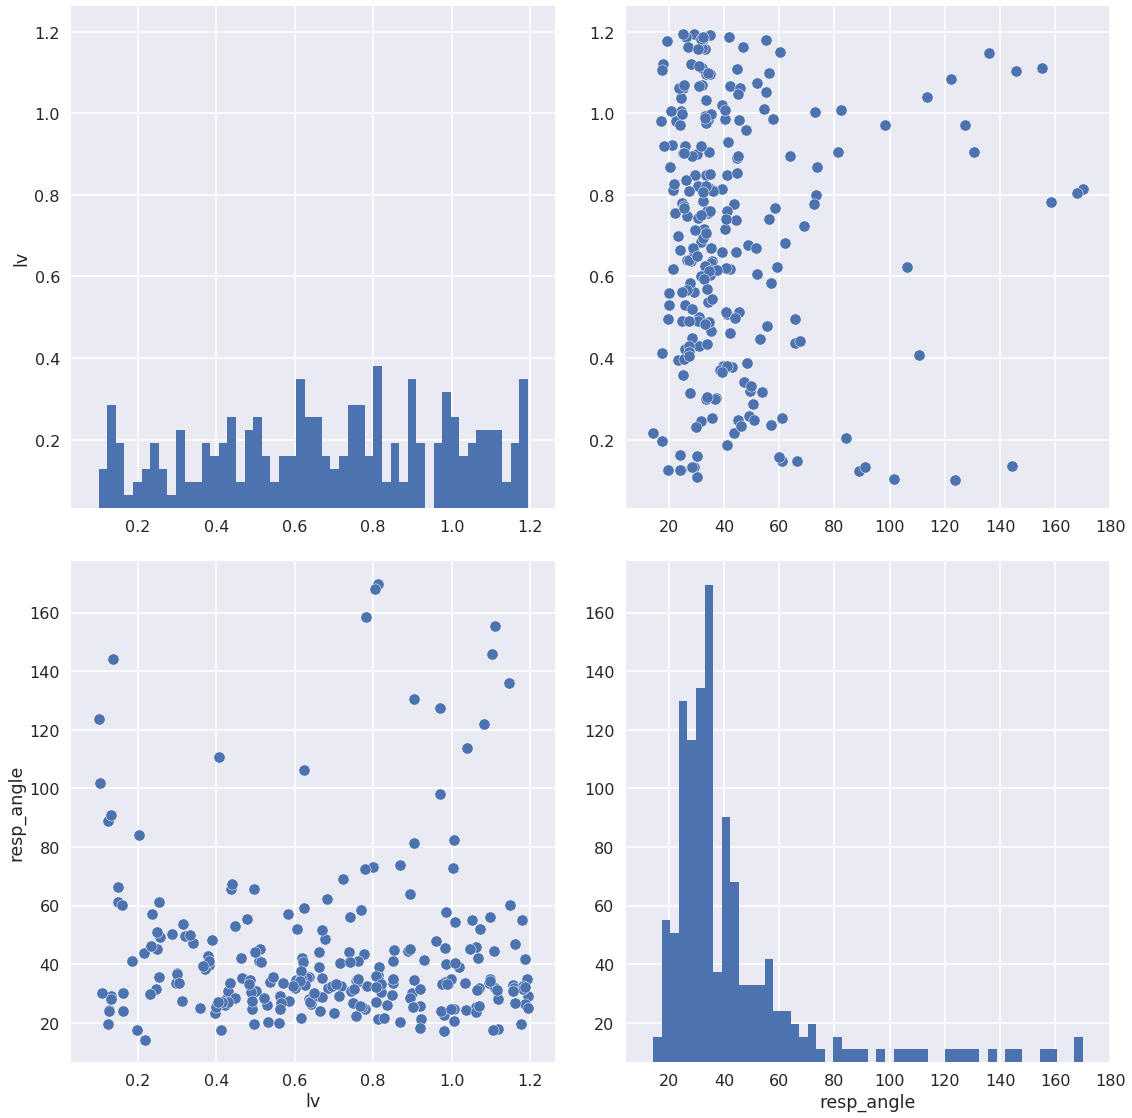

In [8]:
sns.set('poster')
g = sns.pairplot(df, size=8, diag_kws={'bins':50})

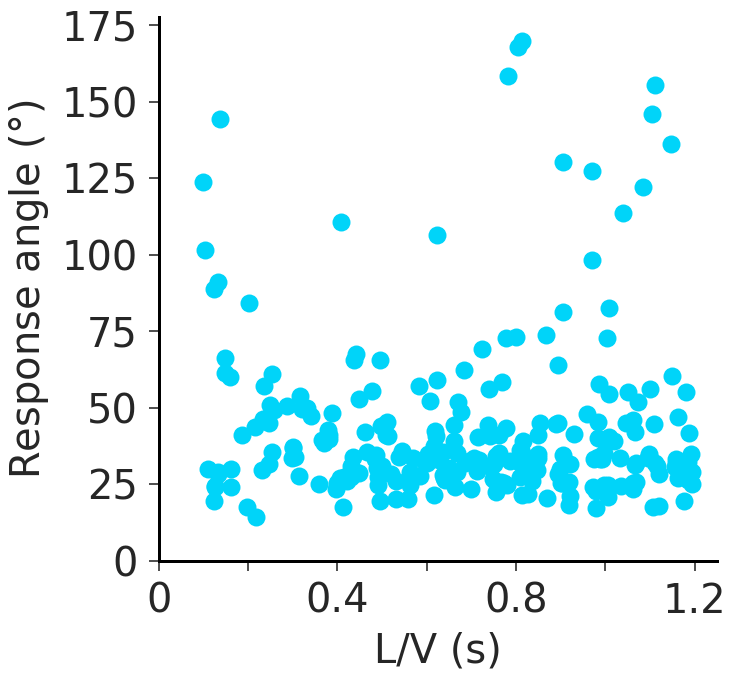

In [9]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 40
mpl.rcParams['xtick.labelsize'] = 40
mpl.rcParams['ytick.labelsize'] = 40
mpl.rcParams['axes.labelsize'] = 40
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['axes.edgecolor'] = 'k'
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.labelpad'] = 10
fig = plt.figure(figsize=(10,10))
plt.plot(df['lv'], df['resp_angle'], 'o', color='#00d4f9', ms=18)
plt.xlabel('L/V (s)')
plt.ylabel('Response angle ($\degree$)')
plt.gca().set_facecolor('w')
plt.xticks(np.arange(7)*0.2, [0, '', 0.4, '', 0.8, '', 1.2])
plt.yticks(np.arange(8)*25, np.arange(8)*25)
plt.savefig('../figures/expm_theta_vs_lv.eps', bbox_inches='tight')
plt.savefig('../figures/expm_theta_vs_lv.jpg', bbox_inches='tight')

In [11]:
df['lv_grouped'] = df['lv'].map(md.lv_map)

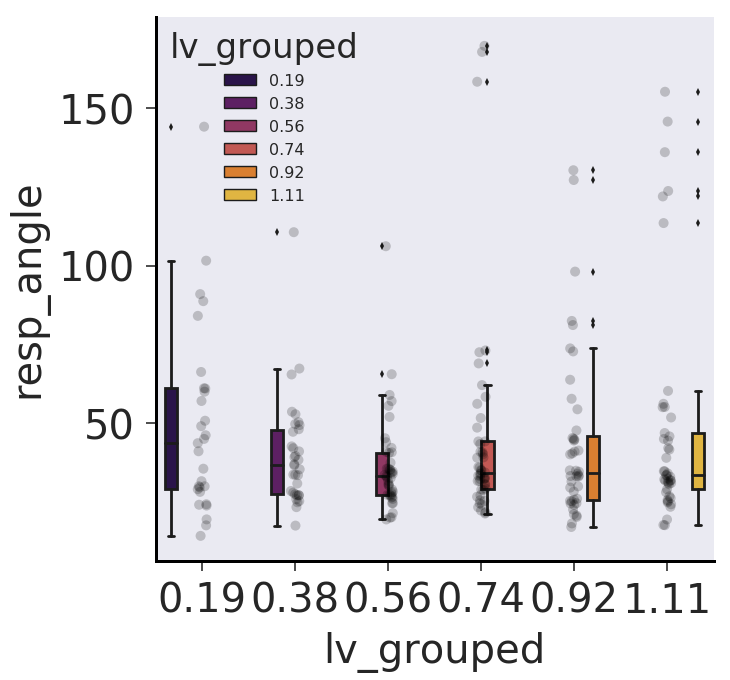

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = sns.stripplot(x='lv_grouped', y='resp_angle', jitter=0.05, color='k', alpha=0.2, data=df, size=10)
ax = sns.boxplot(x='lv_grouped', y='resp_angle', hue='lv_grouped', palette='inferno', data=df)